In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [2]:
titanic = pd.read_csv('titanic.csv', index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
titanic.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [4]:
titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [5]:
titanic.Embarked.isna().sum()

2

In [6]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
titanic.Embarked.fillna(titanic.Embarked.value_counts().idxmax(), inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [8]:
mean_ages = titanic.groupby('Sex').Age.mean()
mean_ages

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
def fill_age(row: pd.Series):
    if row.Age != row.Age:
        row.Age = mean_ages[row.Sex]
    return row

In [10]:
titanic = titanic.apply(fill_age, axis=1)
titanic.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [11]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
889,0,3,27.915709,1,2,23.4500,1,0,0,0,1


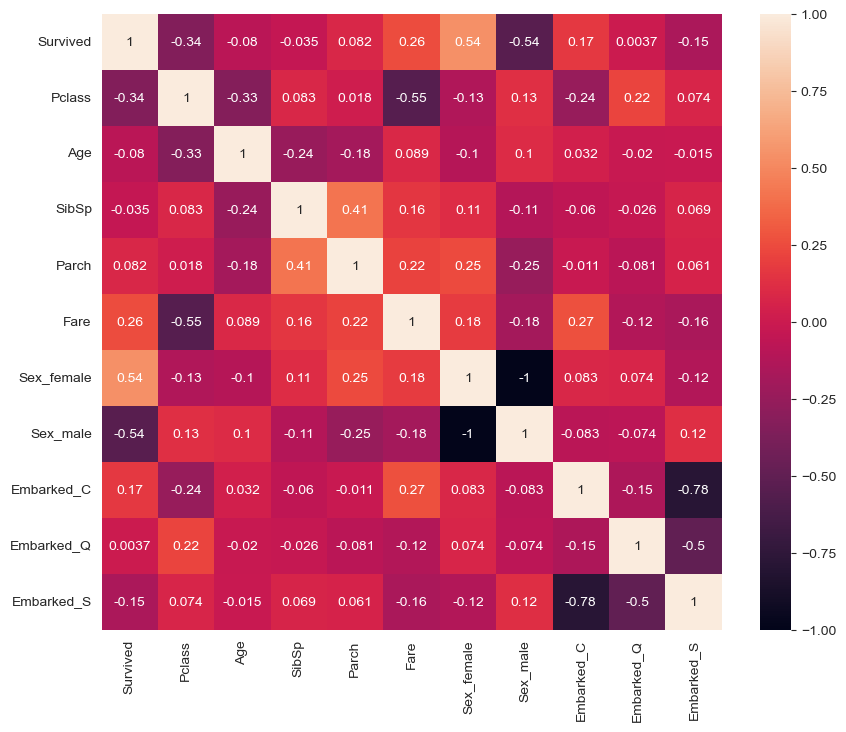

In [12]:
_, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True);

In [13]:
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.000000,7.2500,0,1,0,0,1
2,1,1,38.000000,71.2833,1,0,1,0,0
3,1,3,26.000000,7.9250,1,0,0,0,1
4,1,1,35.000000,53.1000,1,0,0,0,1
5,0,3,35.000000,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,13.0000,0,1,0,0,1
888,1,1,19.000000,30.0000,1,0,0,0,1
889,0,3,27.915709,23.4500,1,0,0,0,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1), titanic.Survived)

In [15]:
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': range(1, 101)}, cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)
knn_cv.best_score_

0.7246661429693637

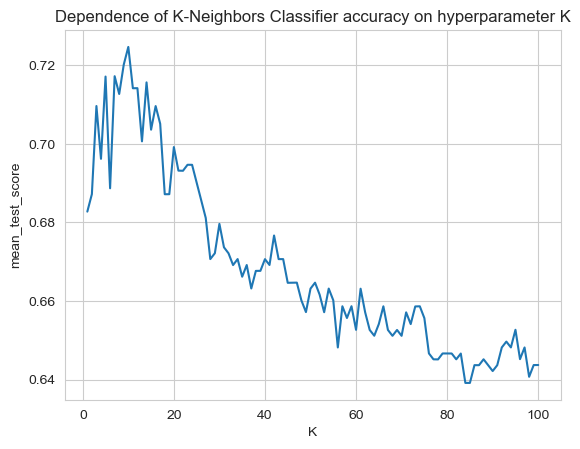

In [16]:
_, axes = plt.subplots()
axes.set_xlabel('K')
axes.set_ylabel('mean_test_score')
axes.set_title('Dependence of K-Neighbors Classifier accuracy on hyperparameter K')
sns.lineplot(x=range(1, 101), y=knn_cv.cv_results_['mean_test_score'], ax=axes);

In [17]:
knn_score = mean_squared_error(knn_cv.predict(X_test), y_test)
knn_score

0.26905829596412556

In [18]:
dtc_cv = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(1, 101)})
dtc_cv.fit(X_train, y_train)
dtc_cv.best_score_

0.8143081584558411

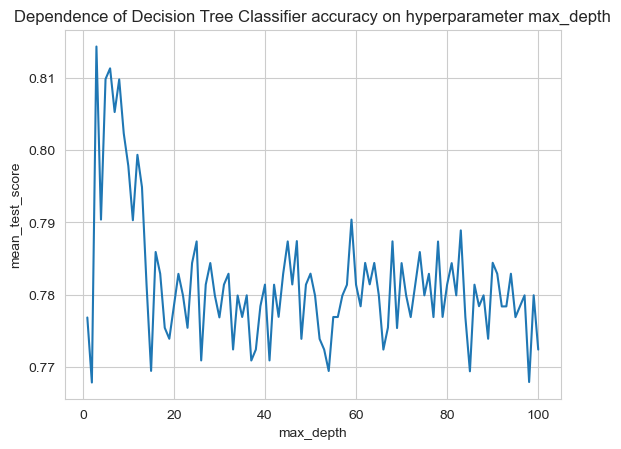

In [19]:
_, axes = plt.subplots()
axes.set_xlabel('max_depth')
axes.set_ylabel('mean_test_score')
axes.set_title('Dependence of Decision Tree Classifier accuracy on hyperparameter max_depth')
sns.lineplot(x=range(1, 101), y=dtc_cv.cv_results_['mean_test_score'], ax=axes);

In [20]:
dtc_score = mean_squared_error(dtc_cv.predict(X_test), y_test)
dtc_score

0.18834080717488788

In [21]:
rfc_cv = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': range(1, 101)})
rfc_cv.fit(X_train, y_train)
rfc_cv.best_score_

0.8128717315677253

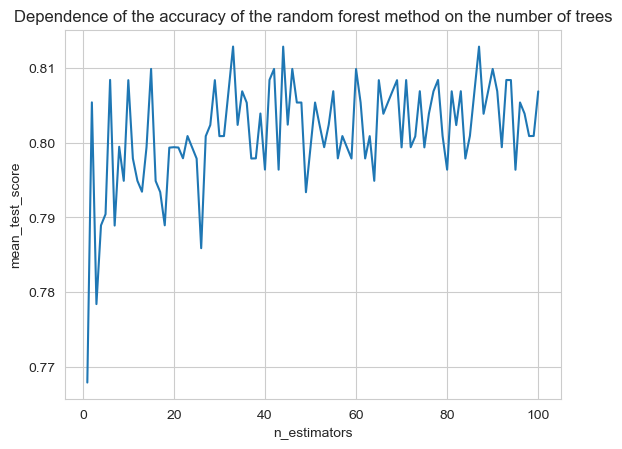

In [22]:
_, axes = plt.subplots()
axes.set_xlabel('n_estimators')
axes.set_ylabel('mean_test_score')
axes.set_title('Dependence of the accuracy of the random forest method on the number of trees')
sns.lineplot(x=range(1, 101), y=rfc_cv.cv_results_['mean_test_score'], ax=axes);

In [23]:
rfc_score = mean_squared_error(rfc_cv.predict(X_test), y_test)
rfc_score

0.17040358744394618

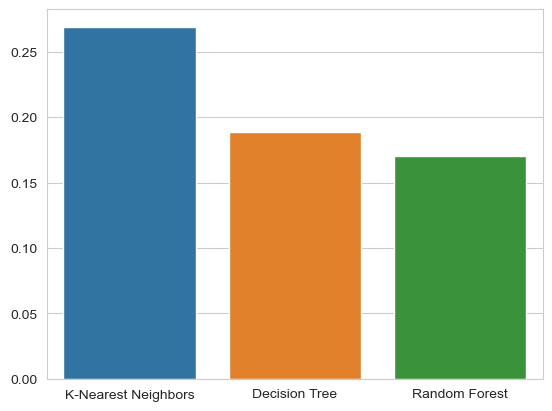

In [24]:
sns.barplot(
    x=['K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    y=[knn_score, dtc_score, rfc_score]
);